In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

***Creating the Dataframes that will be used for the Notebook***

In [346]:
teis_df = pd.read_excel(r'/Users/eykin/Desktop/Eddie Documentsls/projects/teis-concatahoula_leopards/data/bdi3_all_evals_for_nss_11_2023.xlsx')
teis_df

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [347]:
teis_df.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
teis_df.describe()

,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive T-Score,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional T-Score,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication T-Score,Motor Sum of Scaled Scores,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
count,23939.000000,23939.000000,23939.000000,23927.000000,23927.000000,23927.000000,23912.000000,23912.000000,23912.000000,23912.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,11.728268,86.988304,41.326204,22.773770,94.293601,46.197476,13.020241,79.060723,36.040482,22.871654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.001474,17.689509,11.782294,7.700521,16.819322,11.215540,6.805753,20.417259,13.611506,8.297234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,46.000000,14.000000,2.000000,46.000000,14.000000,2.000000,46.000000,14.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.000000,76.000000,34.000000,17.000000,84.000000,39.000000,8.000000,64.000000,26.000000,17.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11.000000,88.000000,42.000000,22.000000,94.000000,46.000000,13.000000,79.000000,36.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,16.000000,100.000000,50.000000,28.000000,106.000000,54.000000,18.000000,94.000000,46.000000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,36.000000,148.000000,82.000000,53.000000,154.000000,86.000000,38.000000,154.000000,86.000000,50.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [349]:
teis_df=teis_df.drop_duplicates()
teis_df.reset_index()
teis_df= teis_df.rename(columns={'Location - Sub Level 1':'Location'})

In [350]:
#data type checking cell:
type(teis_df['Adaptive RDI'][2])

str

***Cleaning the main dataframe: teis_df***

In [351]:
teis_df=teis_df.drop(labels=['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10'], axis='columns')

In [352]:
teis_df

,Child ID,Gender,Date of Birth,Location,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


In [353]:
teis_df.tail(3297)

#no_ids=teis_df.tail(3291)
#no_ids

,Child ID,Gender,Date of Birth,Location,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
20650,564281\t,F,2021-03-16,Upper Cumberland,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,90/90,...,21.0,13.0,84,38,98/90,502.0,494 - 511,1,60.0,71
20651,564679\t,M,2020-12-16,Southeast Tennessee,BDI-3 Eligibility Evaluation,18.0,94.0,34,87-101,82/90,...,12.0,6.0,9,22,1990-08-01 00:00:00,451.0,429 - 473,– 1.33,37.0,22
20652,565734\t,M,2022-02-16,Greater Nashville,BDI-3 Eligibility Evaluation,6.0,80.0,9,73-93,21/90,...,13.0,12.0,75,25,98/90,464.0,450 - 479,0.67,57.0,64
20653,565977\t,F,2022-04-21,Southeast Tennessee,BDI-3 Eligibility Evaluation,1.0,55.0,0.1,51-71,<1/90,...,8.0,5.0,5,8,1990-06-01 00:00:00,395.0,376 - 415,– 1.67,33.0,15
20654,566491\t,M,2021-06-04,East Tennessee,BDI-3 Eligibility Evaluation,13.0,79.0,8,73-87,53/90,...,13.0,9.0,37,25,73/90,464.0,450 - 479,– 0.33,47.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


In [354]:
counts=teis_df.groupby('Location')['Child ID'].count().reset_index()
counts

,Location,Child ID
0,East Tennessee,3340
1,First Tennessee,1701
2,Greater Nashville,3436
3,Memphis Delta,2717
4,Northwest,955
5,South Central,2560
6,Southeast Tennessee,1583
7,Southwest,1100
8,Upper Cumberland,2021


In [355]:
level_counts = teis_df.groupby('Program Label')['Child ID'].count()
level_counts

Program Label
BDI-3 Annual Evaluation                6905
BDI-3 Eligibility Evaluation          12392
BDI-3 Milestone or Exit Evaluation      203
Name: Child ID, dtype: int64

In [356]:
domain_df= teis_df[['Child ID', 'Gender', 'Adaptive Developmental Quotient', 'Social-Emotional Developmental Quotient', 'Communication Developmental Quotient', 'Motor Developmental Quotient', 'Cognitive Developmental Quotient']]
domain_df

,Child ID,Gender,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
0,44879,F,85.0,127.0,91.0,88.0,100.0
1,47795,F,88.0,104.0,97.0,102.0,100.0
2,54340,M,90.0,91.0,82.0,109.0,83.0
3,54344,F,115.0,103.0,88.0,91.0,113.0
4,54515,M,75.0,73.0,70.0,73.0,97.0
...,...,...,...,...,...,...,...
23942,SP03287,F,115.0,115.0,112.0,118.0,113.0
23943,SP03288,F,115.0,116.0,112.0,117.0,122.0
23944,SP03289,F,103.0,102.0,55.0,104.0,98.0
23945,SP03290,M,88.0,90.0,76.0,100.0,88.0


Text(0.5, 1.0, 'Cognitive')

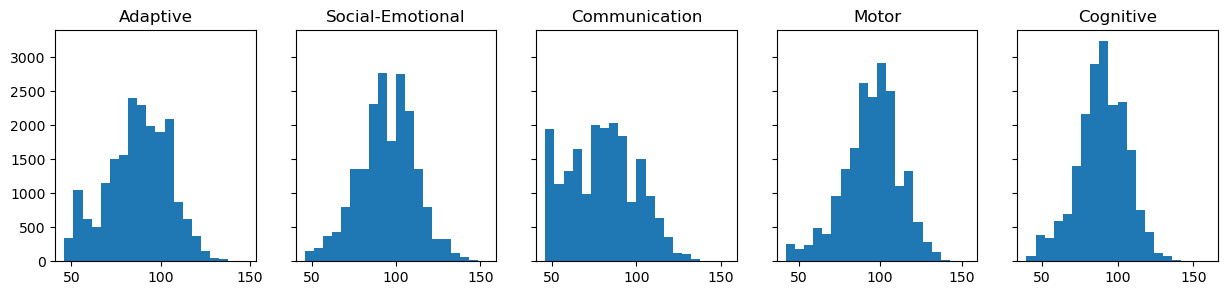

In [357]:
n_bins=20
fig, axs = plt.subplots(1, 5, sharey=True,figsize=(15,3))

axs[0].hist(domain_df['Adaptive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[0].set_title('Adaptive')
axs[1].hist(domain_df['Social-Emotional Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[1].set_title('Social-Emotional')
axs[2].hist(domain_df['Communication Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[2].set_title('Communication')
axs[3].hist(domain_df['Motor Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[3].set_title('Motor')
axs[4].hist(domain_df['Cognitive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[4].set_title('Cognitive')



**Change to Seaborn**

Text(0.5, 0, '')

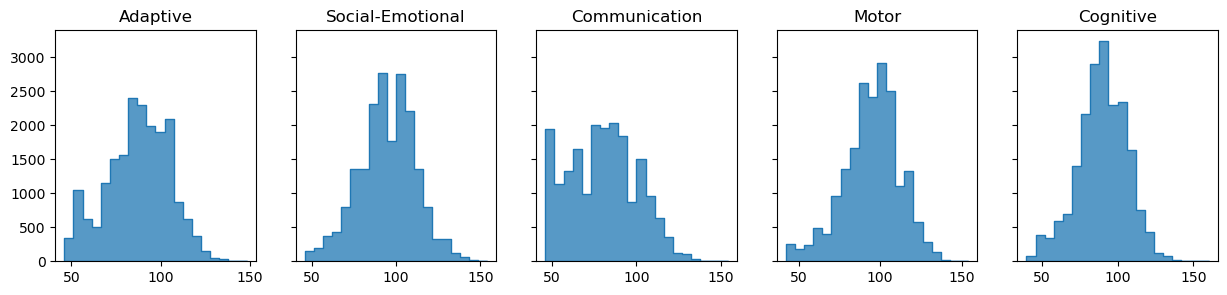

In [423]:
n_bins = 20
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(15, 3))

sns.histplot(domain_df['Adaptive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[0], element='step', fill=True)
axs[0].set_title('Adaptive')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
sns.histplot(domain_df['Social-Emotional Developmental Quotient'], bins=n_bins, kde=False, ax=axs[1], element='step', fill=True)
axs[1].set_title('Social-Emotional')
axs[1].set_xlabel('')
sns.histplot(domain_df['Communication Developmental Quotient'], bins=n_bins, kde=False, ax=axs[2], element='step', fill=True)
axs[2].set_title('Communication')
axs[2].set_xlabel('')
sns.histplot(domain_df['Motor Developmental Quotient'], bins=n_bins, kde=False, ax=axs[3], element='step', fill=True)
axs[3].set_title('Motor')
axs[3].set_xlabel('')
sns.histplot(domain_df['Cognitive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[4], element='step', fill=True)
axs[4].set_title('Cognitive')
axs[4].set_xlabel('')

**To Seaborn with Colors**

Text(0.5, 0, '')

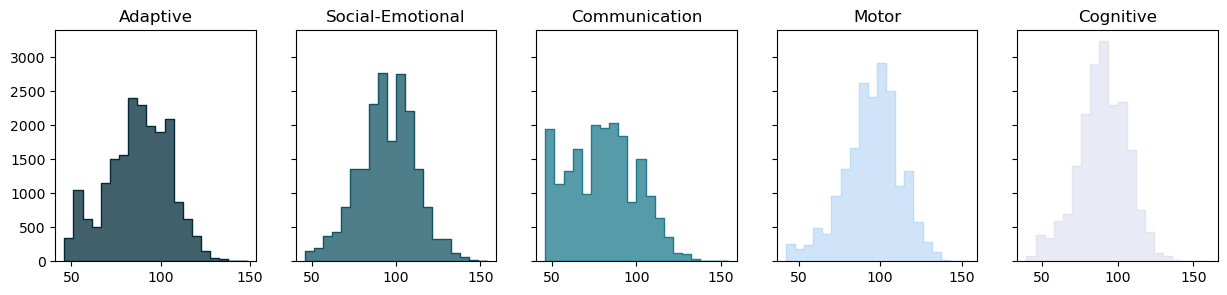

In [425]:
dq_dict = {
    'Adaptive Developmental Quotient': '#022B3A',
    'Social-Emotional Developmental Quotient': '#115363',
    'Communication Developmental Quotient': '#1F7A8C',
    'Motor Developmental Quotient': '#BFDBF7',
    'Cognitive Developmental Quotient': '#E1E5F2',
}

n_bins = 20
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(15, 3))


sns.histplot(domain_df['Adaptive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[0], element='step', fill=True, color=dq_dict['Adaptive Developmental Quotient'])
axs[0].set_title('Adaptive')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

sns.histplot(domain_df['Social-Emotional Developmental Quotient'], bins=n_bins, kde=False, ax=axs[1], element='step', fill=True, color=dq_dict['Social-Emotional Developmental Quotient'])
axs[1].set_title('Social-Emotional')
axs[1].set_xlabel('')

sns.histplot(domain_df['Communication Developmental Quotient'], bins=n_bins, kde=False, ax=axs[2], element='step', fill=True, color=dq_dict['Communication Developmental Quotient'])
axs[2].set_title('Communication')
axs[2].set_xlabel('')

sns.histplot(domain_df['Motor Developmental Quotient'], bins=n_bins, kde=False, ax=axs[3], element='step', fill=True, color=dq_dict['Motor Developmental Quotient'])
axs[3].set_title('Motor')
axs[3].set_xlabel('')

sns.histplot(domain_df['Cognitive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[4], element='step', fill=True, color=dq_dict['Cognitive Developmental Quotient'])
axs[4].set_title('Cognitive')
axs[4].set_xlabel('')

u_gender=domain_df.loc[domain_df['Gender']=='U']
u_gender

****Gathering Averages for each column****

In [358]:
adaptive_avg = domain_df.groupby('Gender')['Adaptive Developmental Quotient'].agg(np.mean).to_frame()
adaptive_avg


,Adaptive Developmental Quotient
Gender,
F,89.246515
M,86.281914
U,89.683673


In [359]:
social_avg = domain_df.groupby('Gender')['Social-Emotional Developmental Quotient'].agg(np.mean).to_frame()
social_avg

,Social-Emotional Developmental Quotient
Gender,
F,96.327993
M,93.385420
U,92.789116


In [360]:
#pulling two averaged columns into a shared data frame to build off of
average_df= adaptive_avg.merge(social_avg, how='outer', on='Gender')
average_df

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient
Gender,,
F,89.246515,96.327993
M,86.281914,93.385420
U,89.683673,92.789116


****Averaging the rest of the columns****

In [361]:
comm_avg = domain_df.groupby('Gender')['Communication Developmental Quotient'].agg(np.mean).to_frame()
comm_avg

,Communication Developmental Quotient
Gender,
F,82.821952
M,77.534796
U,84.500000


In [362]:
motor_avg = domain_df.groupby('Gender')['Motor Developmental Quotient'].agg(np.mean).to_frame()
motor_avg

,Motor Developmental Quotient
Gender,
F,95.079773
M,94.057267
U,98.965986


In [363]:
cog_avg = domain_df.groupby('Gender')['Cognitive Developmental Quotient'].agg(np.mean).to_frame()
cog_avg

,Cognitive Developmental Quotient
Gender,
F,90.646547
M,87.968779
U,94.452381


average_df= adaptive_avg.merge(social_avg, how='outer', on='Gender')
average_df

average_df= average_df.merge(comm_avg, how='outer', on='Gender')
average_df

****Merging the averaged columns into 1 dataframe****

In [364]:
average_df= average_df.merge(comm_avg, how='outer', on='Gender')
average_df= average_df.merge(motor_avg, how='outer', on='Gender')
average_df= average_df.merge(cog_avg, how='outer', on='Gender')
average_df.reset_index()

,Gender,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
0,F,89.246515,96.327993,82.821952,95.079773,90.646547
1,M,86.281914,93.385420,77.534796,94.057267,87.968779
2,U,89.683673,92.789116,84.500000,98.965986,94.452381


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Adaptive Developmental Quotient'),
  Text(1, 0, 'Social-Emotional Developmental Quotient'),
  Text(2, 0, 'Communication Developmental Quotient'),
  Text(3, 0, 'Motor Developmental Quotient'),
  Text(4, 0, 'Cognitive Developmental Quotient')])

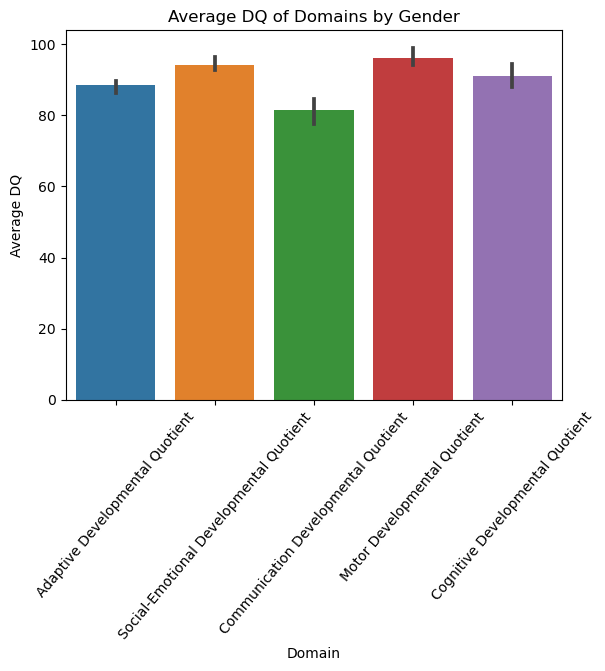

In [365]:
sns.barplot(data=average_df)
plt.title('Average DQ of Domains by Gender')
plt.ylabel('Average DQ')
plt.xlabel('Domain')
plt.xticks(rotation = 50)
#plt.savefig('tripsbyday.png')

***Adaptive Sub Domain df***

In [366]:
adaptive_sub_df=teis_df[['Child ID','Gender', 'Adaptive-Self Care SS','Adaptive-Personal Responsibility SS']]
#adaptive_sub_df.fillna("N/A",inplace=True)
adaptive_sub_df

,Child ID,Gender,Adaptive-Self Care SS,Adaptive-Personal Responsibility SS
0,44879,F,7.0,NaN
1,47795,F,7.0,9.0
2,54340,M,8.0,NaN
3,54344,F,13.0,NaN
4,54515,M,5.0,NaN
...,...,...,...,...
23942,SP03287,F,13.0,NaN
23943,SP03288,F,10.0,15.0
23944,SP03289,F,10.0,11.0
23945,SP03290,M,6.0,10.0


****Gathering the averages for the sub-domain****

In [367]:
adapt_selfcare_avg = adaptive_sub_df.groupby('Gender')['Adaptive-Self Care SS'].agg(np.mean).to_frame()
adapt_selfcare_avg

,Adaptive-Self Care SS
Gender,
F,7.815735
M,7.228942
U,7.680272


In [368]:
adapt_pr_avg = adaptive_sub_df.groupby('Gender')['Adaptive-Personal Responsibility SS'].agg(np.mean).to_frame()
adapt_pr_avg

,Adaptive-Personal Responsibility SS
Gender,
F,8.217945
M,7.800633
U,8.949045


***Adding them together***

In [369]:
adapt_sub_avg= adapt_selfcare_avg.merge(adapt_pr_avg, how='outer', on='Gender')
adapt_sub_avg

,Adaptive-Self Care SS,Adaptive-Personal Responsibility SS
Gender,,
F,7.815735,8.217945
M,7.228942,7.800633
U,7.680272,8.949045


***Social Emotional***

In [370]:
se_sub_df=teis_df[['Child ID','Gender', 'Social Emotional-Adult Interaction SS','Social Emotional-Peer Interaction SS','Social Emotional-Self Concept / Social Role SS']]
#se_sub_df.fillna("N/A",inplace=True)
se_sub_df

se_adult_avg = se_sub_df.groupby('Gender')['Social Emotional-Adult Interaction SS'].agg(np.mean).to_frame()
se_adult_avg

se_peer_avg = se_sub_df.groupby('Gender')['Social Emotional-Peer Interaction SS'].agg(np.mean).to_frame()
se_peer_avg

se_self_social_avg = se_sub_df.groupby('Gender')['Social Emotional-Self Concept / Social Role SS'].agg(np.mean).to_frame()
se_self_social_avg

,Social Emotional-Self Concept / Social Role SS
Gender,
F,8.457332
M,7.786778
U,7.574830


**Adding Them Together - Social-Emotional**

In [371]:
adapt_sub_avg= adapt_selfcare_avg.merge(adapt_pr_avg, how='outer', on='Gender')
adapt_sub_avg

se_sub_avg= se_adult_avg.merge(se_peer_avg, how = 'outer', on='Gender')
se_sub_avg

se_sub_avg2= se_sub_avg.merge(se_self_social_avg, how = 'outer', on='Gender')
se_sub_avg2

,Social Emotional-Adult Interaction SS,Social Emotional-Peer Interaction SS,Social Emotional-Self Concept / Social Role SS
Gender,,,
F,10.595001,8.142902,8.457332
M,10.361918,7.685977,7.786778
U,10.619048,7.464968,7.574830


***Adding the Examiner Column to investigate trends later on***

In [372]:
domain_df['Examiner']=teis_df['Adaptive-Self Care Examiner']
domain_df

C:\Users\eykin\AppData\Local\Temp\ipykernel_27820\998188400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_df['Examiner']=teis_df['Adaptive-Self Care Examiner']


,Child ID,Gender,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,Examiner
0,44879,F,85.0,127.0,91.0,88.0,100.0,Kelly Bryan
1,47795,F,88.0,104.0,97.0,102.0,100.0,Patti Lyle
2,54340,M,90.0,91.0,82.0,109.0,83.0,Karen McMillion
3,54344,F,115.0,103.0,88.0,91.0,113.0,Jennifer Vines
4,54515,M,75.0,73.0,70.0,73.0,97.0,Ally Simmons
...,...,...,...,...,...,...,...,...
23942,SP03287,F,115.0,115.0,112.0,118.0,113.0,Rachel Anderson
23943,SP03288,F,115.0,116.0,112.0,117.0,122.0,Joanna Jones
23944,SP03289,F,103.0,102.0,55.0,104.0,98.0,Joanna Jones
23945,SP03290,M,88.0,90.0,76.0,100.0,88.0,Lauryn Hartness


Text(0.5, 1.0, 'Cognitive')

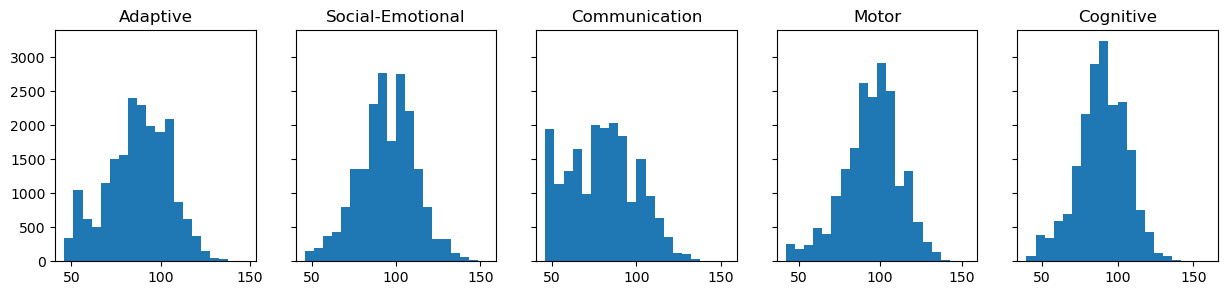

In [373]:
n_bins=20
fig, axs = plt.subplots(1, 5, sharey=True,figsize=(15,3))

axs[0].hist(domain_df['Adaptive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[0].set_title('Adaptive')
axs[1].hist(domain_df['Social-Emotional Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[1].set_title('Social-Emotional')
axs[2].hist(domain_df['Communication Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[2].set_title('Communication')
axs[3].hist(domain_df['Motor Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[3].set_title('Motor')
axs[4].hist(domain_df['Cognitive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[4].set_title('Cognitive')

**To Seaborn**

Text(0.5, 0, '')

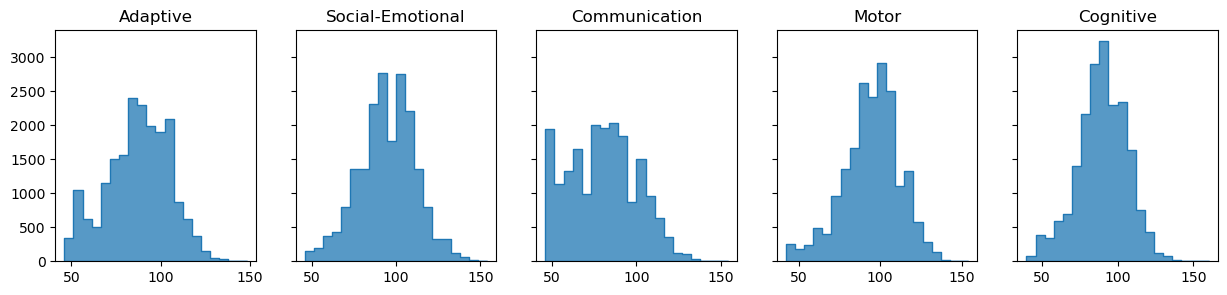

In [427]:
n_bins = 20
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(15, 3))


sns.histplot(domain_df['Adaptive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[0], element='step', fill=True)
axs[0].set_title('Adaptive')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
sns.histplot(domain_df['Social-Emotional Developmental Quotient'], bins=n_bins, kde=False, ax=axs[1], element='step', fill=True)
axs[1].set_title('Social-Emotional')
axs[1].set_xlabel('')
sns.histplot(domain_df['Communication Developmental Quotient'], bins=n_bins, kde=False, ax=axs[2], element='step', fill=True)
axs[2].set_title('Communication')
axs[2].set_xlabel('')
sns.histplot(domain_df['Motor Developmental Quotient'], bins=n_bins, kde=False, ax=axs[3], element='step', fill=True)
axs[3].set_title('Motor')
axs[3].set_xlabel('')
sns.histplot(domain_df['Cognitive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[4], element='step', fill=True)
axs[4].set_title('Cognitive')
axs[4].set_xlabel('')


**To Seaborn with Colors**

Text(0.5, 0, '')

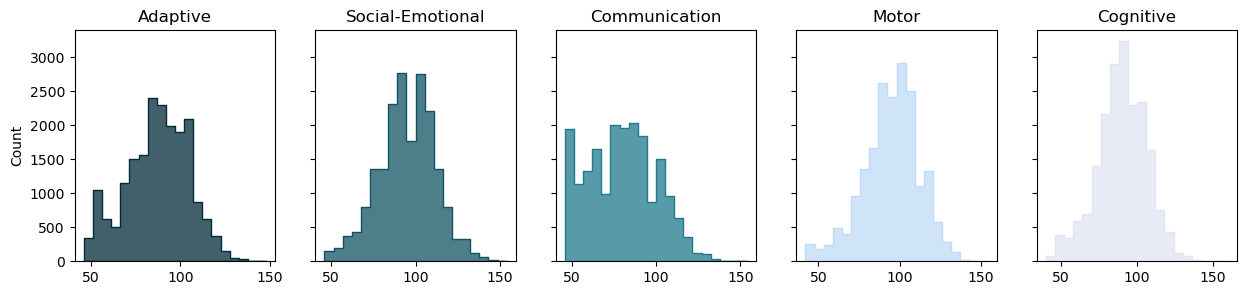

In [436]:
dq_dict = {
    'Adaptive Developmental Quotient': '#022B3A',
    'Social-Emotional Developmental Quotient': '#115363',
    'Communication Developmental Quotient': '#1F7A8C',
    'Motor Developmental Quotient': '#BFDBF7',
    'Cognitive Developmental Quotient': '#E1E5F2',
}

n_bins = 20
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(15, 3))

sns.histplot(domain_df['Adaptive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[0], element='step', fill=True, color=dq_dict['Adaptive Developmental Quotient'])
axs[0].set_title('Adaptive')
axs[0].set_xlabel('')
sns.histplot(domain_df['Social-Emotional Developmental Quotient'], bins=n_bins, kde=False, ax=axs[1], element='step', fill=True, color=dq_dict['Social-Emotional Developmental Quotient'])
axs[1].set_title('Social-Emotional')
axs[1].set_xlabel('')
sns.histplot(domain_df['Communication Developmental Quotient'], bins=n_bins, kde=False, ax=axs[2], element='step', fill=True, color=dq_dict['Communication Developmental Quotient'])
axs[2].set_title('Communication')
axs[2].set_xlabel('')
sns.histplot(domain_df['Motor Developmental Quotient'], bins=n_bins, kde=False, ax=axs[3], element='step', fill=True, color=dq_dict['Motor Developmental Quotient'])
axs[3].set_title('Motor')
axs[3].set_xlabel('')
sns.histplot(domain_df['Cognitive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[4], element='step', fill=True, color=dq_dict['Cognitive Developmental Quotient'])
axs[4].set_title('Cognitive')
axs[4].set_xlabel('')

***Counting the number of Evaluations by Examiner***

In [374]:
examiner_df=teis_df.groupby('Adaptive-Self Care Examiner')['Child ID'].count().sort_values(ascending=False).reset_index(name='Number of Evals')

examiner_df['Examiner']=examiner_df['Adaptive-Self Care Examiner']
examiner_df

#examiner_df_max=examiner_df[examiner_df['Number of Evals'] == examiner_df['Number of Evals'].max()]
#print(examiner_df_max)
#examiner_df_min=examiner_df[examiner_df['Number of Evals'] == examiner_df['Number of Evals'].min()]
#print(examiner_df_min)

,Adaptive-Self Care Examiner,Number of Evals,Examiner
0,Kelly Brackney,430,Kelly Brackney
1,Tracey Hardiman,415,Tracey Hardiman
2,Emily Williams,376,Emily Williams
3,Kelly Bryan,373,Kelly Bryan
4,Kathie Reuss,372,Kathie Reuss
...,...,...,...
100,Amanda Harris,2,Amanda Harris
101,Sara Turner,2,Sara Turner
102,Karie Quick,2,Karie Quick
103,Bonnie Jones,1,Bonnie Jones


***Getting Average Score for each examiner in each domain and merging it into one dataframe***

In [375]:
examiner_adapt_avg= domain_df.groupby('Examiner')['Adaptive Developmental Quotient'].agg(np.mean).to_frame()
examiner_social_avg=domain_df.groupby('Examiner')['Social-Emotional Developmental Quotient'].agg(np.mean).to_frame()
examiner_comm_avg=domain_df.groupby('Examiner')['Communication Developmental Quotient'].agg(np.mean).to_frame()
examiner_motor_avg=domain_df.groupby('Examiner')['Motor Developmental Quotient'].agg(np.mean).to_frame()
examiner_cog_avg=domain_df.groupby('Examiner')['Cognitive Developmental Quotient'].agg(np.mean).to_frame()

In [376]:
examiner_avg_df=examiner_adapt_avg.merge(examiner_social_avg, how='outer', on='Examiner')
examiner_avg_df=examiner_avg_df.merge(examiner_comm_avg, how='outer', on='Examiner')
examiner_avg_df=examiner_avg_df.merge(examiner_motor_avg, how='outer', on='Examiner')
examiner_avg_df=examiner_avg_df.merge(examiner_cog_avg, how='outer', on='Examiner')


examiner_avg_df

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
Examiner,,,,,
Abby Spence,95.739130,105.304348,84.636646,102.139752,94.838509
Alexis Linville,88.031339,91.168091,79.153846,96.931624,91.592593
Alice Starnes,87.469231,93.776923,79.787645,94.112403,87.730769
Allison Coontz,83.643777,97.064378,76.849785,88.257511,85.081545
Ally Simmons,84.757475,90.056478,80.973422,92.840532,90.857143
...,...,...,...,...,...
Tiffany Maynard,87.527211,94.540816,80.163265,93.547619,83.574830
Tiffany Treadway,76.828025,74.375796,71.910828,91.006369,82.343949
Toni London,83.670103,88.628866,77.340206,90.707904,87.608247


***Adding the counts to the averages for one grand dataframe***

In [377]:
examiner_grand_df=examiner_avg_df.merge(examiner_df, how='inner', on='Examiner').drop(labels='Adaptive-Self Care Examiner', axis='columns')
examiner_grand_df.sort_values('Number of Evals',ascending=False)

,Examiner,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,Number of Evals
61,Kelly Brackney,80.153846,88.461538,81.909091,90.539720,88.851163,430
103,Tracey Hardiman,87.108434,98.531401,81.437956,96.645477,97.429612,415
35,Emily Williams,89.438830,105.712766,81.944149,101.186170,97.585106,376
62,Kelly Bryan,93.474531,104.643432,83.520107,101.544236,92.809651,373
56,Kathie Reuss,85.196237,82.311828,77.572581,92.236559,81.660377,372
...,...,...,...,...,...,...,...
5,Amanda Harris,95.000000,80.500000,64.000000,110.500000,93.500000,2
93,Sara Turner,85.500000,72.500000,55.000000,82.000000,76.500000,2
54,Karie Quick,80.000000,122.500000,121.000000,113.500000,133.500000,2
18,Bonnie Jones,60.000000,115.000000,70.000000,85.000000,107.000000,1


(array([12.,  8.,  4.,  4.,  6.,  4.,  8.,  5.,  3.,  2.,  5.,  7., 10.,
         6.,  5.,  3.,  7.,  4.,  0.,  2.]),
 array([  1.  ,  22.45,  43.9 ,  65.35,  86.8 , 108.25, 129.7 , 151.15,
        172.6 , 194.05, 215.5 , 236.95, 258.4 , 279.85, 301.3 , 322.75,
        344.2 , 365.65, 387.1 , 408.55, 430.  ]),
 <BarContainer object of 20 artists>)

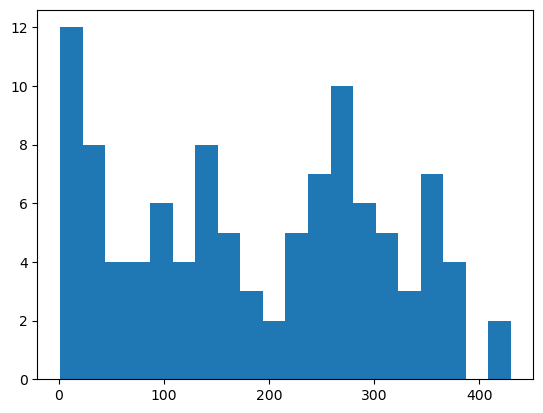

In [378]:
plt.hist(x=examiner_grand_df['Number of Evals'], bins=20)

**To Seaborn**

Text(0.5, 1.0, 'Histogram for Number of Evals')

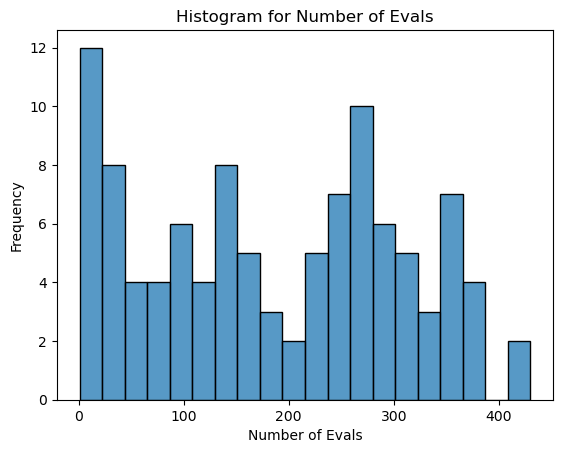

In [396]:
sns.histplot(examiner_grand_df['Number of Evals'], bins=20, kde=False)
plt.xlabel('Number of Evals')  
plt.ylabel('Frequency')  
plt.title('Histogram for Number of Evals') 

Text(0.5, 1.0, 'Cognitive')

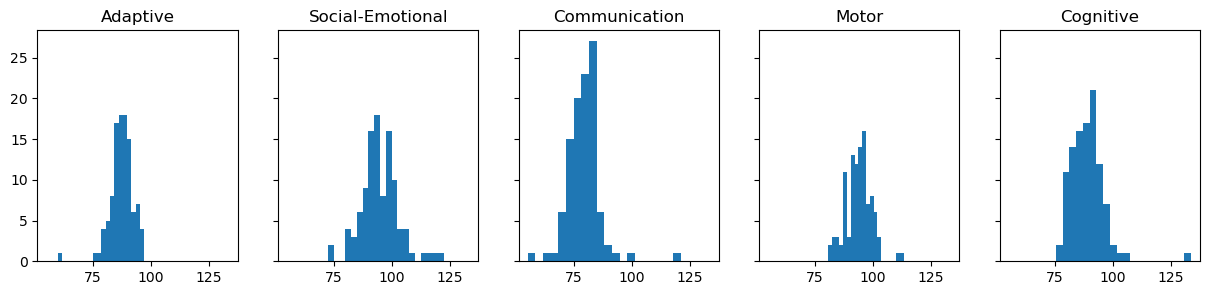

In [379]:
n_bins=20
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True,figsize=(15,3))

axs[0].hist(examiner_grand_df['Adaptive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[0].set_title('Adaptive')
axs[1].hist(examiner_grand_df['Social-Emotional Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[1].set_title('Social-Emotional')
axs[2].hist(examiner_grand_df['Communication Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[2].set_title('Communication')
axs[3].hist(examiner_grand_df['Motor Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[3].set_title('Motor')
axs[4].hist(examiner_grand_df['Cognitive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[4].set_title('Cognitive')



**To Seaborn**

Text(0.5, 0, '')

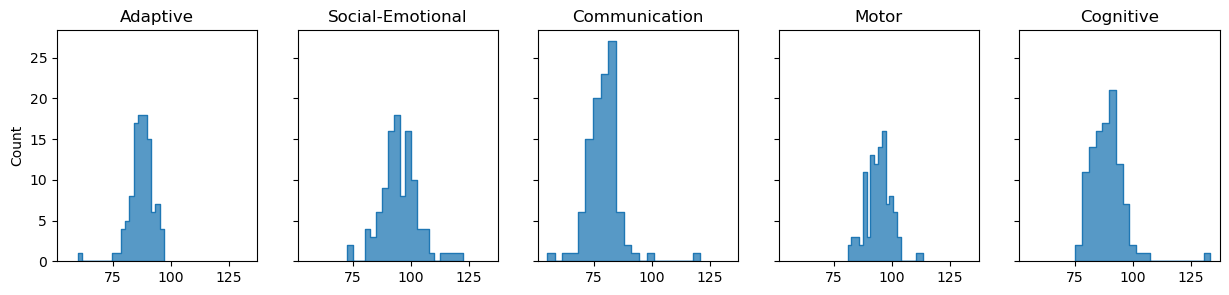

In [429]:
n_bins = 20
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(15, 3))

sns.histplot(examiner_grand_df['Adaptive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[0], element='step', fill=True)
axs[0].set_title('Adaptive')
axs[0].set_xlabel('')
sns.histplot(examiner_grand_df['Social-Emotional Developmental Quotient'], bins=n_bins, kde=False, ax=axs[1], element='step', fill=True)
axs[1].set_title('Social-Emotional')
axs[1].set_xlabel('')
sns.histplot(examiner_grand_df['Communication Developmental Quotient'], bins=n_bins, kde=False, ax=axs[2], element='step', fill=True)
axs[2].set_title('Communication')
axs[2].set_xlabel('')
sns.histplot(examiner_grand_df['Motor Developmental Quotient'], bins=n_bins, kde=False, ax=axs[3], element='step', fill=True)
axs[3].set_title('Motor')
axs[3].set_xlabel('')
sns.histplot(examiner_grand_df['Cognitive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[4], element='step', fill=True)
axs[4].set_title('Cognitive')
axs[4].set_xlabel('')

**To Seaborn with Colors**

Text(0.5, 0, '')

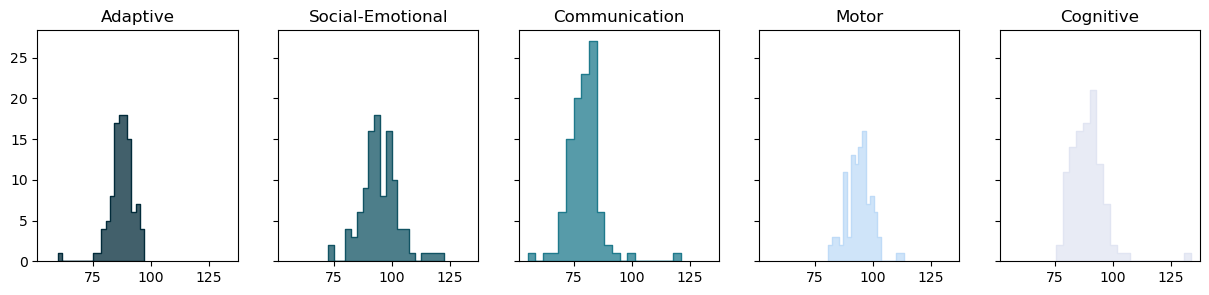

In [435]:
dq_dict = {
    'Adaptive Developmental Quotient': '#022B3A',
    'Social-Emotional Developmental Quotient': '#115363',
    'Communication Developmental Quotient': '#1F7A8C',
    'Motor Developmental Quotient': '#BFDBF7',
    'Cognitive Developmental Quotient': '#E1E5F2',
}

n_bins = 20
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(15, 3))

sns.histplot(examiner_grand_df['Adaptive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[0], element='step', fill=True, color=dq_dict['Adaptive Developmental Quotient'])
axs[0].set_title('Adaptive')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
sns.histplot(examiner_grand_df['Social-Emotional Developmental Quotient'], bins=n_bins, kde=False, ax=axs[1], element='step', fill=True, color=dq_dict['Social-Emotional Developmental Quotient'])
axs[1].set_title('Social-Emotional')
axs[1].set_xlabel('')
sns.histplot(examiner_grand_df['Communication Developmental Quotient'], bins=n_bins, kde=False, ax=axs[2], element='step', fill=True, color=dq_dict['Communication Developmental Quotient'])
axs[2].set_title('Communication')
axs[2].set_xlabel('')
sns.histplot(examiner_grand_df['Motor Developmental Quotient'], bins=n_bins, kde=False, ax=axs[3], element='step', fill=True, color=dq_dict['Motor Developmental Quotient'])
axs[3].set_title('Motor')
axs[3].set_xlabel('')
sns.histplot(examiner_grand_df['Cognitive Developmental Quotient'], bins=n_bins, kde=False, ax=axs[4], element='step', fill=True, color=dq_dict['Cognitive Developmental Quotient'])
axs[4].set_title('Cognitive')
axs[4].set_xlabel('')

<Axes: xlabel='Adaptive Developmental Quotient', ylabel='Number of Evals'>

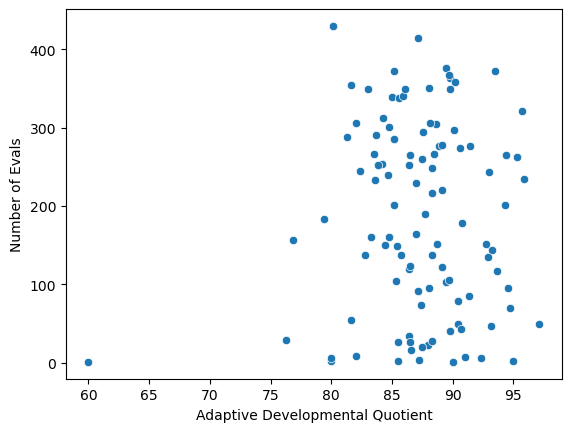

In [380]:
sns.scatterplot(examiner_grand_df, x='Adaptive Developmental Quotient', y='Number of Evals')

<Axes: xlabel='Social-Emotional Developmental Quotient', ylabel='Number of Evals'>

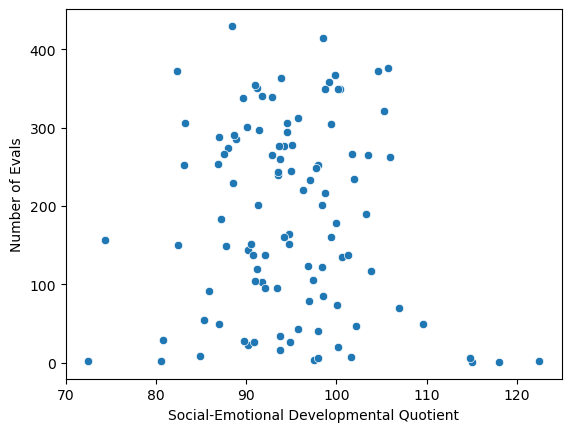

In [381]:
sns.scatterplot(examiner_grand_df, x='Social-Emotional Developmental Quotient', y='Number of Evals')

<Axes: xlabel='Communication Developmental Quotient', ylabel='Number of Evals'>

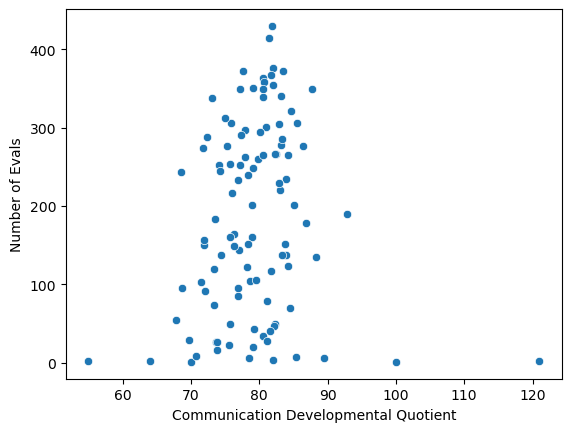

In [382]:
sns.scatterplot(examiner_grand_df, x='Communication Developmental Quotient', y='Number of Evals')

<Axes: xlabel='Motor Developmental Quotient', ylabel='Number of Evals'>

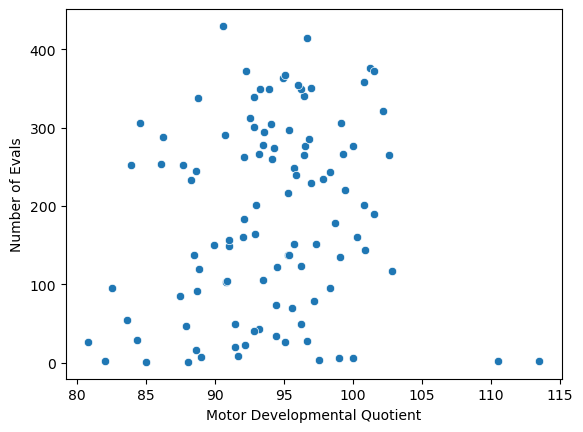

In [383]:
sns.scatterplot(examiner_grand_df, x='Motor Developmental Quotient', y='Number of Evals')

<Axes: xlabel='Cognitive Developmental Quotient', ylabel='Number of Evals'>

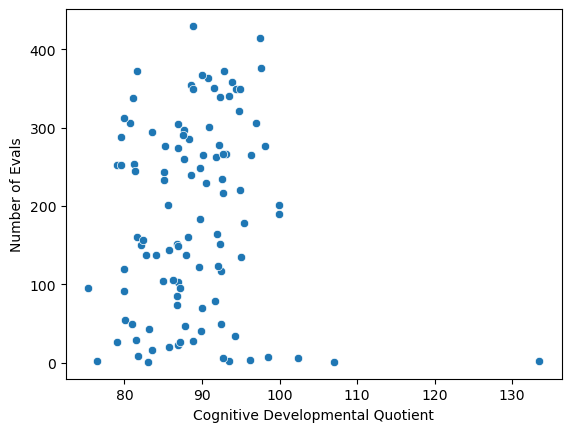

In [384]:
sns.scatterplot(examiner_grand_df, x='Cognitive Developmental Quotient', y='Number of Evals')

Text(0.5, 1.0, 'Cognitive')

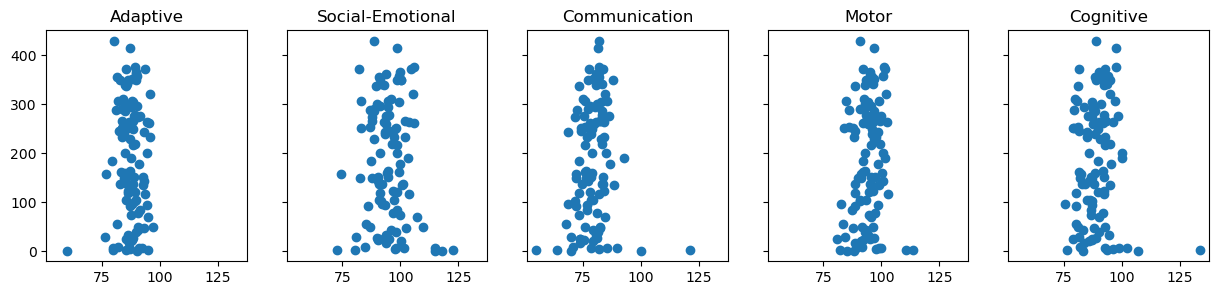

In [385]:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True,figsize=(15,3))

axs[0].scatter(x= examiner_grand_df['Adaptive Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[0].set_title('Adaptive')
axs[1].scatter(examiner_grand_df['Social-Emotional Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[1].set_title('Social-Emotional')
axs[2].scatter(examiner_grand_df['Communication Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[2].set_title('Communication')
axs[3].scatter(examiner_grand_df['Motor Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[3].set_title('Motor')
axs[4].scatter(examiner_grand_df['Cognitive Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[4].set_title('Cognitive')

**To Seaborn**

Text(0.5, 0, '')

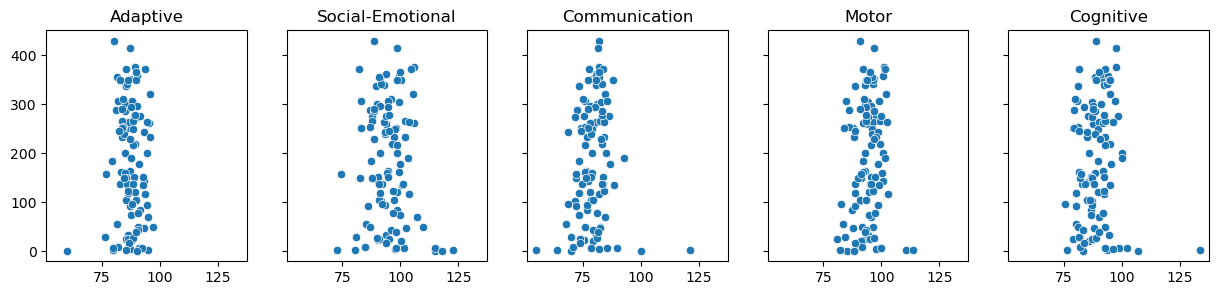

In [431]:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(15, 3))

sns.scatterplot(x=examiner_grand_df['Adaptive Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[0])
axs[0].set_title('Adaptive')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
sns.scatterplot(x=examiner_grand_df['Social-Emotional Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[1])
axs[1].set_title('Social-Emotional')
axs[1].set_xlabel('')
sns.scatterplot(x=examiner_grand_df['Communication Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[2])
axs[2].set_title('Communication')
axs[2].set_xlabel('')
sns.scatterplot(x=examiner_grand_df['Motor Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[3])
axs[3].set_title('Motor')
axs[3].set_xlabel('')
sns.scatterplot(x=examiner_grand_df['Cognitive Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[4])
axs[4].set_title('Cognitive')
axs[4].set_xlabel('')

**To Seaborn with colors**

Text(0.5, 0, '')

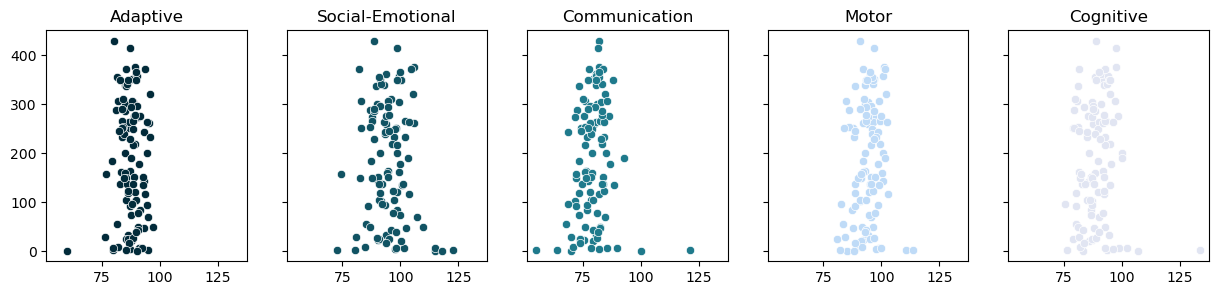

In [434]:
dq_dict = {
    'Adaptive Developmental Quotient': '#022B3A',
    'Social-Emotional Developmental Quotient': '#115363',
    'Communication Developmental Quotient': '#1F7A8C',
    'Motor Developmental Quotient': '#BFDBF7',
    'Cognitive Developmental Quotient': '#E1E5F2',
}

fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(15, 3))


sns.scatterplot(x=examiner_grand_df['Adaptive Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[0], color=dq_dict['Adaptive Developmental Quotient'])
axs[0].set_title('Adaptive')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
sns.scatterplot(x=examiner_grand_df['Social-Emotional Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[1], color=dq_dict['Social-Emotional Developmental Quotient'])
axs[1].set_title('Social-Emotional')
axs[1].set_xlabel('')
sns.scatterplot(x=examiner_grand_df['Communication Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[2], color=dq_dict['Communication Developmental Quotient'])
axs[2].set_title('Communication')
axs[2].set_xlabel('')
sns.scatterplot(x=examiner_grand_df['Motor Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[3], color=dq_dict['Motor Developmental Quotient'])
axs[3].set_title('Motor')
axs[3].set_xlabel('')
sns.scatterplot(x=examiner_grand_df['Cognitive Developmental Quotient'], y=examiner_grand_df['Number of Evals'], ax=axs[4], color=dq_dict['Cognitive Developmental Quotient'])
axs[4].set_title('Cognitive')
axs[4].set_xlabel('')

***Some preliminary eda for created dataframes***

In [386]:
examiner_avg_df.describe()

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,87.352029,94.927596,79.175272,94.019370,88.997928
std,5.006718,8.105065,7.248643,5.533128,7.415711
min,60.000000,72.500000,55.000000,80.807692,75.364583
25%,84.991150,90.173913,75.608696,90.836538,84.021898
50%,87.500000,94.480392,79.150000,94.262774,88.529167
75%,90.101010,99.340984,82.496241,96.938865,92.666667
max,97.142857,122.500000,121.000000,113.500000,133.500000


In [387]:
avg_per_domain = domain_df.describe().reset_index()
avg_per_domain

,index,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
0,count,19493.000000,19483.000000,19469.000000,19471.000000,19481.000000
1,mean,87.435079,94.470051,79.604499,94.511222,89.061804
2,std,17.438731,16.695712,20.168400,17.288802,16.498114
3,min,46.000000,46.000000,46.000000,42.000000,40.000000
4,25%,76.000000,84.000000,64.000000,85.000000,80.000000
5,50%,88.000000,96.000000,79.000000,96.000000,90.000000
6,75%,100.000000,106.000000,94.000000,106.000000,100.000000
7,max,148.000000,154.000000,154.000000,154.000000,160.000000


In [388]:
low_cog=examiner_avg_df['Cognitive Developmental Quotient'].sort_values(ascending=True).head(105)
low_cog

Examiner
Rachel Anderson      75.364583
Sara Turner          76.500000
Catherine Pippin     79.076923
Amelia Ferguson      79.108000
James Brown          79.510417
                       ...    
Kathy Cooper         99.930348
Patti Lyle           99.942105
Terri McCarter      102.333333
Bonnie Jones        107.000000
Karie Quick         133.500000
Name: Cognitive Developmental Quotient, Length: 105, dtype: float64

In [389]:
examiner_adapt_count= domain_df.groupby('Examiner')['Adaptive Developmental Quotient'].count().to_frame()
examiner_adapt_count

,Adaptive Developmental Quotient
Examiner,
Abby Spence,322
Alexis Linville,351
Alice Starnes,260
Allison Coontz,233
Ally Simmons,301
...,...
Tiffany Maynard,294
Tiffany Treadway,157
Toni London,291


In [390]:
adaptive_examiner_df=teis_df[['Child ID','Gender','Adaptive-Self Care Examiner','Adaptive-Personal Responsibility Examiner','Adaptive-Self Care SS','Adaptive-Personal Responsibility SS']]
adaptive_examiner_df

,Child ID,Gender,Adaptive-Self Care Examiner,Adaptive-Personal Responsibility Examiner,Adaptive-Self Care SS,Adaptive-Personal Responsibility SS
0,44879,F,Kelly Bryan,NaN,7.0,NaN
1,47795,F,Patti Lyle,Patti Lyle,7.0,9.0
2,54340,M,Karen McMillion,NaN,8.0,NaN
3,54344,F,Jennifer Vines,NaN,13.0,NaN
4,54515,M,Ally Simmons,NaN,5.0,NaN
...,...,...,...,...,...,...
23942,SP03287,F,Rachel Anderson,NaN,13.0,NaN
23943,SP03288,F,Joanna Jones,Joanna Jones,10.0,15.0
23944,SP03289,F,Joanna Jones,Joanna Jones,10.0,11.0
23945,SP03290,M,Lauryn Hartness,Lauryn Hartness,6.0,10.0


In [391]:
selfcare_examiner_scores=adaptive_examiner_df.groupby('Adaptive-Self Care Examiner')['Adaptive-Self Care SS'].agg(np.mean).to_frame().reset_index()
selfcare_examiner_scores

,Adaptive-Self Care Examiner,Adaptive-Self Care SS
0,Abby Spence,8.574534
1,Alexis Linville,7.569801
2,Alice Starnes,7.615385
3,Allison Coontz,7.094421
4,Ally Simmons,6.641196
...,...,...
100,Tiffany Maynard,7.438776
101,Tiffany Treadway,6.280255
102,Toni London,7.298969
103,Tracey Hardiman,7.171084


In [392]:
pr_examiner_scores=adaptive_examiner_df.groupby('Adaptive-Personal Responsibility Examiner')['Adaptive-Personal Responsibility SS'].agg(np.mean).to_frame().reset_index()
pr_examiner_scores

,Adaptive-Personal Responsibility Examiner,Adaptive-Personal Responsibility SS
0,Abby Spence,10.565217
1,Alexis Linville,8.468750
2,Alice Starnes,7.661290
3,Allison Coontz,6.266667
4,Ally Simmons,8.328671
...,...,...
95,Tiffany Maynard,7.893805
96,Tiffany Treadway,3.432836
97,Toni London,6.091503
98,Tracey Hardiman,8.793548
